In [89]:
import torch
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn

In [90]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Funçoes

In [91]:
def plot_roc_curve(modelos, legendas, dataloader, device):
    plt.figure()
    lw = 2

    for i, modelo in enumerate(modelos):
        modelo.to(device)
        modelo.eval()  # Define o modelo para o modo de avaliação
        all_labels = []
        all_probs = []

        with torch.no_grad():  # Desliga o cálculo de gradientes para economizar memória e acelerar o processo
            for _, (data, target) in enumerate(dataloader):
                target, imgs = target.float().to(device), data.to(device)

                pred_probs = torch.sigmoid(modelo(imgs)).cpu().numpy()  # Probabilidades previstas pelo modelo
                all_probs.extend(pred_probs)
                all_labels.extend(target.cpu().numpy())

        fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
        roc_auc = auc(fpr, tpr)

        # Use a legenda correspondente ao modelo atual
        plt.plot(fpr, tpr, lw=lw, label=f'{legendas[i]} ROC curve (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


In [92]:
def recuperar_rede(path,Classe):
    modelo = Classe(100*100)
    checkpoint= torch.load(path,map_location=torch.device('cuda'))
    modelo.load_state_dict(checkpoint)
    return modelo.eval()

# dataloader

In [93]:
teste = torch.load("data/teste.pt")

In [94]:
class CustomDataset(Dataset):
    def __init__(self, data_tensor, transform=None):
        self.data = data_tensor
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Obtendo a imagem (vetor) e o rótulo (target) da linha idx do tensor
        image = self.data[idx, 1:-1]
        label = self.data[idx, -1].long()

        # Aplicando transformações, se necessário
        if self.transform:
            image = self.transform(image)

        return image, label


In [95]:
dataset_teste = CustomDataset(teste)
batch_size = 128  
test_dataloader = DataLoader(dataset_teste, batch_size=batch_size, shuffle=True)

# Incluindo os modelos

## Modelo com 10 Neurônios

In [96]:

class Classification10N(nn.Module):
  def __init__(self,entrada):
    super().__init__()


    self.layers = nn.Sequential(
        nn.Linear(entrada,10),
        nn.ReLU(),
        nn.Linear(10,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.layers(x)

In [97]:
path = "model/img/10_neuronios.pth"
modelo10N = recuperar_rede(path,Classification10N)

In [98]:
modelo10N

Classification10N(
  (layers): Sequential(
    (0): Linear(in_features=10000, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

## Modelo com 7510 Neurônios

In [99]:
class MLPClassification7510N(nn.Module):
  def __init__(self,entrada):
    super().__init__()


    self.layers = nn.Sequential(
        nn.Linear(entrada,5000),
        nn.ReLU(),
        nn.Linear(5000,2500),
        nn.ReLU(),
        nn.Linear(2500,10),
        nn.ReLU(),
        nn.Linear(10,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.layers(x)

In [100]:
path = "model/img/7510_neuronios_unica.pth"
modelo7510N = recuperar_rede(path,MLPClassification7510N)

## Modelo com 160 Neurônios

In [101]:
class MLPClassificationN160(nn.Module):
  def __init__(self,entrada):
    super().__init__()


    self.layers = nn.Sequential(
        nn.Linear(entrada,100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.layers(x)

In [102]:
path = "model/img/160_neuronios_unica.pth"
modelo160N = recuperar_rede(path,MLPClassificationN160)

## Modelo com 1510 Neurônios

In [103]:
class MLPClassification1510N(nn.Module):
  def __init__(self,entrada):
    super().__init__()


    self.layers = nn.Sequential(
        nn.Linear(entrada,1000),
        nn.ReLU(),
        nn.Linear(1000,500),
        nn.ReLU(),
        nn.Linear(500,10),
        nn.ReLU(),
        nn.Linear(10,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.layers(x)


In [104]:
path= "model/img/1510_neuronios.pth"
modelo1510N = recuperar_rede(path,MLPClassification1510N)

## Modelo com 1510 Neurônios Unica

In [105]:
class MLPClassification1510NUnica(nn.Module):
  def __init__(self,entrada):
    super().__init__()


    self.layers = nn.Sequential(
        nn.Linear(entrada,1500),
        nn.ReLU(),
        nn.Linear(1500,10),
        nn.ReLU(),
        nn.Linear(10,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.layers(x)

In [106]:
path= "model/img/1510_neuronios_unica.pth"
modelo1510NU = recuperar_rede(path,MLPClassification1510NUnica)

# plotando

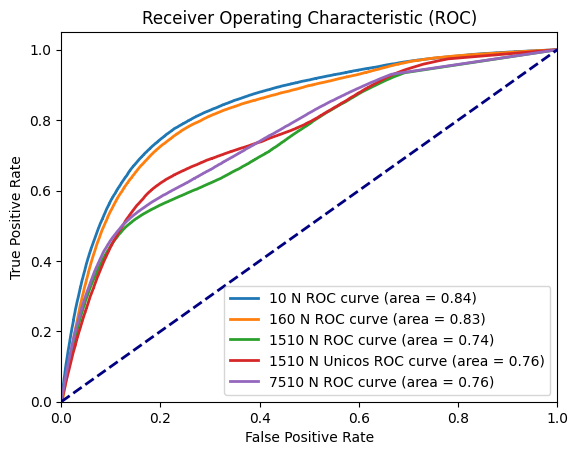

In [108]:
modelos = [modelo10N,modelo160N,modelo1510N, modelo1510NU,modelo7510N]
legenda = ["10 N","160 N","1510 N","1510 N Unicos","7510 N"]
plot_roc_curve(modelos, legenda,test_dataloader,device)
